In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install segmentation-models
!pip install tensorflow==2.1.0
!pip install keras==2.3.1

In [2]:
!pip install livelossplot
%matplotlib inline

In [3]:
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import normalize, to_categorical

Using TensorFlow backend.


In [4]:
import tensorflow as tf
import segmentation_models as sm
BACKBONE = 'vgg16'
preprocess_input = sm.get_preprocessing(BACKBONE)

Segmentation Models: using `keras` framework.


In [5]:
SIZE_X = 128 #Resize images (height  = X, width = Y)
SIZE_Y = 128
#Capture training image info as a list
train_images = []

for directory_path in glob.glob("/content/drive/MyDrive/A3_Dataset/dataset1/images_prepped_train"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
#Convert list to array    
train_images = np.array(train_images)

#Capture mask info as a list
train_masks = [] 
for directory_path in glob.glob("/content/drive/MyDrive/A3_Dataset/dataset1/annotations_prepped_train"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
        mask = mask.astype(np.float)
        train_masks.append(mask)
#Convert list to array   
train_masks = np.array(train_masks)

In [6]:

X = train_images
Y = train_masks
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

x_train = normalize (x_train, axis =1)
y_train = normalize (y_train, axis=1)
# preprocess input
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)




In [ ]:
#DataAugmentation
train_datagen = ImageDataGenerator(rotation_range=45,
    width_shift_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
train_datagen.fit(x_train)

train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size = 32)

In [7]:
sm.set_framework('tf.keras')


In [11]:
!pip uninstall h5py
!pip install h5py==2.10.0

Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/h5py-3.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libaec-9c9e97eb.so.0.0.10
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5-00e8fae8.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5_hl-383c339f.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libsz-e7aa62f5.so.2.0.1
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/h5py/*
Proceed (y/n)? y
  Successfully uninstalled h5py-3.1.0
     |████████████████████████████████| 2.9 MB 9.5 MB/s 


In [8]:
 
sm.Unet()
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

model = sm.Unet(BACKBONE, encoder_weights='imagenet',input_shape=(SIZE_X, SIZE_Y, 3))
model.compile(optimizer= opt, loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score],)

print(model.summary())

58892288/58889256 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 128, 128, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 128, 128, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 64, 64, 64)   0           block1_conv2[0][0]               
___________________________

In [9]:
history=model.fit(
   x=x_train,
   y=y_train,
   batch_size=32,
   epochs=15,
   verbose=1,
   validation_data=(x_val, y_val),
)

Train on 293 samples, validate on 74 samples
Epoch 1/15
293/293 [==============================] - 280s 955ms/sample - loss: 1.4541 - iou_score: 0.0593 - val_loss: 34.7787 - val_iou_score: 0.0084
Epoch 2/15
293/293 [==============================] - 278s 947ms/sample - loss: 1.2178 - iou_score: 0.0471 - val_loss: 29.3576 - val_iou_score: 0.0140
Epoch 3/15
293/293 [==============================] - 275s 937ms/sample - loss: 1.2104 - iou_score: 0.0434 - val_loss: 25.0157 - val_iou_score: 0.0243
Epoch 4/15
293/293 [==============================] - 279s 954ms/sample - loss: 1.2095 - iou_score: 0.0426 - val_loss: 22.1161 - val_iou_score: 0.0348
Epoch 5/15
293/293 [==============================] - 286s 976ms/sample - loss: 1.2092 - iou_score: 0.0424 - val_loss: 19.6172 - val_iou_score: 0.0476
Epoch 6/15
293/293 [==============================] - 287s 980ms/sample - loss: 1.2090 - iou_score: 0.0423 - val_loss: 18.0741 - val_iou_score: 0.0571
Epoch 7/15
293/293 [=============================

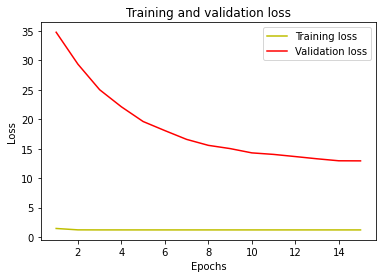

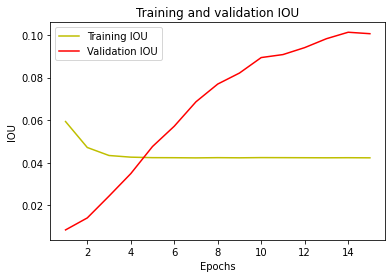

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['iou_score']
val_acc = history.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()


In [11]:
y_pred=model.predict(x_val)
y_pred_argmax=np.argmax(y_pred, axis=3)

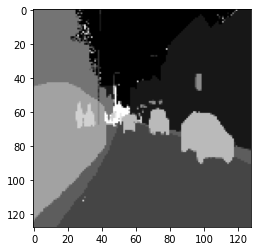

In [13]:
plt.imshow(train_images[0, :,:,0], cmap='gray')
plt.imshow(train_masks[0], cmap='gray')

In [ ]:
SIZE_X = 128 #Resize images (height  = X, width = Y)
SIZE_Y = 128

test_images = []
for directory_path in glob.glob("/content/drive/MyDrive/A3_Dataset/dataset1/images_prepped_test"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
#Convert list to array    
test_images = np.array(test_images)

#Capture mask/label info as a list
test_masks = [] 
for directory_path in glob.glob("/content/drive/MyDrive/A3_Dataset/dataset1/annotations_prepped_test"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
        mask = mask.astype(np.float)        
        test_masks.append(mask)       
#Convert list to array           
test_masks = np.array(test_masks)

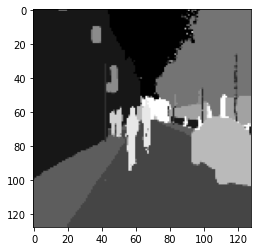

In [16]:
plt.imshow(test_images[0, :,:,0], cmap='gray')
plt.imshow(test_masks[2], cmap='gray')